In [1]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [2]:
fruit <- c("a",'b','c')

In [3]:
print(fruit)

[1] "a" "b" "c"


In [4]:
print(c)

[1] 12


# Clustering

In [5]:
#https://drive.google.com/file/d/1BIjD__-tqkkW6aDH-cVYWw9bjSknjJUj/view?usp=sharing
system('gdown --id 1BIjD__-tqkkW6aDH-cVYWw9bjSknjJUj')

In [6]:
data <- read.csv("clustering.csv")
head(data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
6,LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y


In [7]:
nrow(data)

[1] 381

In [8]:
ncol(data)

[1] 13

In [9]:
summary(data)

   Loan_ID             Gender            Married           Dependents       
 Length:381         Length:381         Length:381         Length:381        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:381         Length:381         Min.   : 150    Min.   :    0    
 Class :character   Class :character   1st Qu.:2600    1st Qu.:    0    
 Mode  :character   Mode  :character   Median :3333    Median :  983    
                                       Mean   :3580    Mean   : 1277    
                   

In [10]:
str(data)

'data.frame':	381 obs. of  13 variables:
 $ Loan_ID          : chr  "LP001003" "LP001005" "LP001006" "LP001008" ...
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "Yes" "Yes" "Yes" "No" ...
 $ Dependents       : chr  "1" "0" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Not Graduate" "Graduate" ...
 $ Self_Employed    : chr  "No" "Yes" "No" "No" ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 ...
 $ CoapplicantIncome: num  1508 0 2358 0 1516 ...
 $ LoanAmount       : num  128 66 120 141 95 70 109 114 17 125 ...
 $ Loan_Amount_Term : num  360 360 360 360 360 360 360 360 120 360 ...
 $ Credit_History   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Property_Area    : chr  "Rural" "Urban" "Urban" "Urban" ...
 $ Loan_Status      : chr  "N" "Y" "Y" "Y" ...


In [11]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [12]:
data_new=select(data, LoanAmount, ApplicantIncome)
head(data_new)

,LoanAmount,ApplicantIncome
,<dbl>,<int>
1,128,4583
2,66,3000
3,120,2583
4,141,6000
5,95,2333
6,70,3200


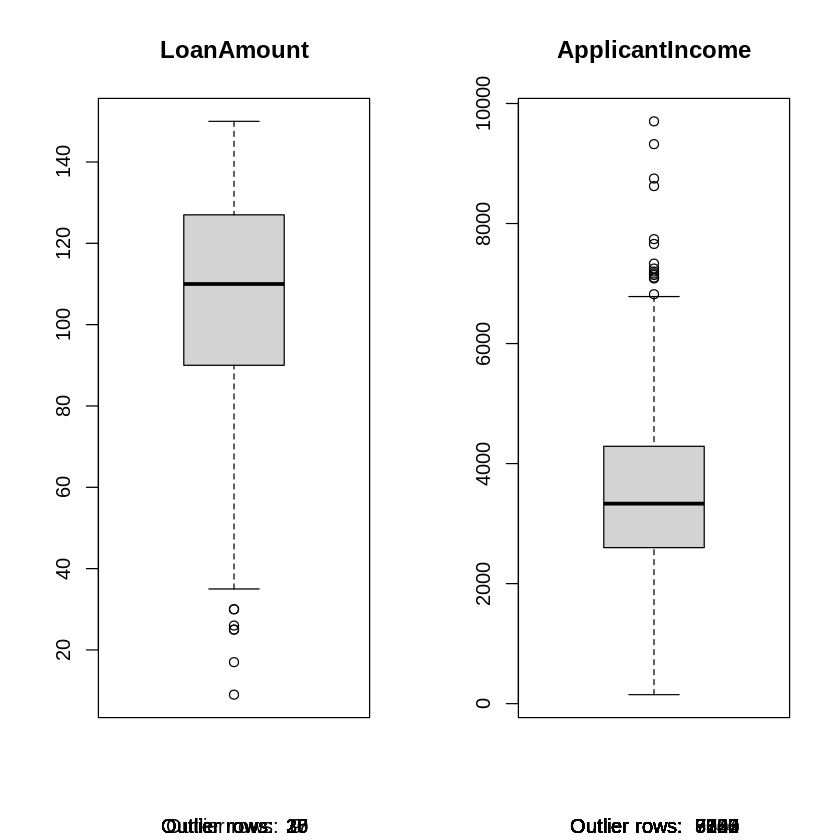

In [13]:
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data_new$LoanAmount, main="LoanAmount",
sub=paste("Outlier rows: ",
boxplot.stats(data_new$LoanAmount)$out))
boxplot(data_new$ApplicantIncome, main="ApplicantIncome",
sub=paste("Outlier rows: ",
boxplot.stats(data_new$ApplicantIncome)$out))

In [14]:
la_outliers <- c(boxplot.stats(data_new$LoanAmount)$out)
print("Loan Amount outliers: ")
print(la_outliers)
ai_outliers <- c(boxplot.stats(data_new$ApplicantIncome)$out)
print("Applicant Income outliers: ")
print(ai_outliers)


[1] "Loan Amount outliers: "
[1] 17 25 25 30 30 26  9
[1] "Applicant Income outliers: "
 [1] 7660 7100 7333 9323 9703 7200 6822 8750 7167 7250 8624 7142 7085 7740


In [15]:
#drop rows have outliers
print(paste("Before drop:", nrow(data_new)))
for (record in la_outliers){
data_new <- data_new[data_new$LoanAmount != record,]
}
for (record in ai_outliers)
{
data_new <- data_new[data_new$ApplicantIncome != record,]
}
print(paste("After drop:", nrow(data_new)))

[1] "Before drop: 381"
[1] "After drop: 360"


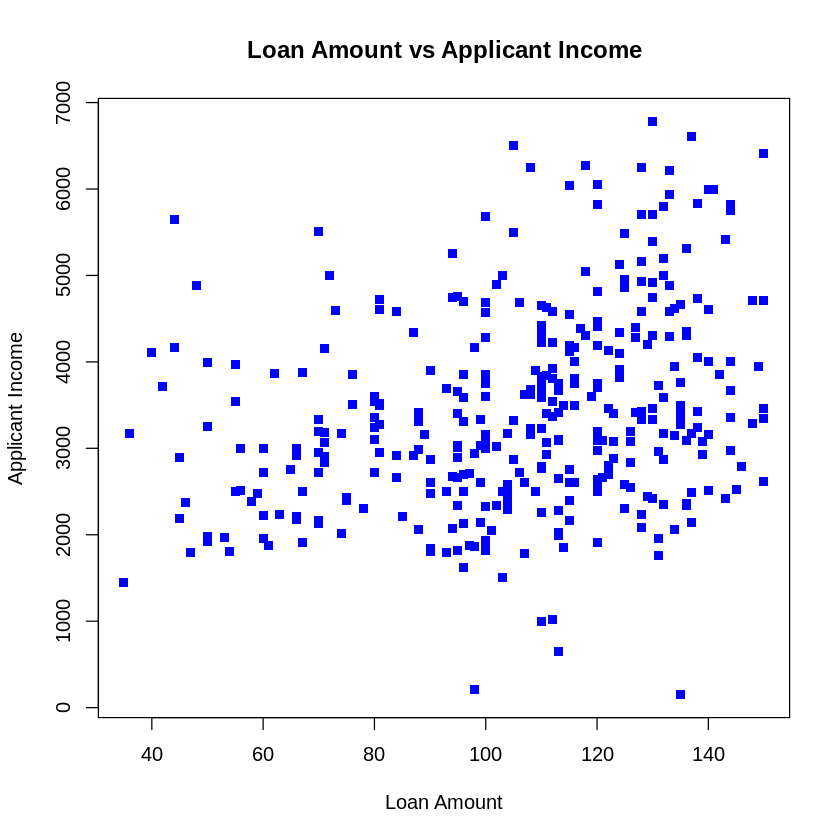

In [16]:
plot(x = data_new$LoanAmount,y = data_new$ApplicantIncome,
xlab = "Loan Amount",
ylab = "Applicant Income",
main = "Loan Amount vs Applicant Income",
pch = 15, col = "blue"
)

**Nhận xét**
Hai biến Loan Amount và Applicant Income không có mối liên hệ tuyến tính với nhau

In [17]:
install.packages("factoextra")
install.packages("cluster")
library('factoextra')
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [18]:
res=get_clust_tendency(data_new, n=nrow(data_new)-1, graph=TRUE)
res$hopkins_stat

[1] 0.7266181

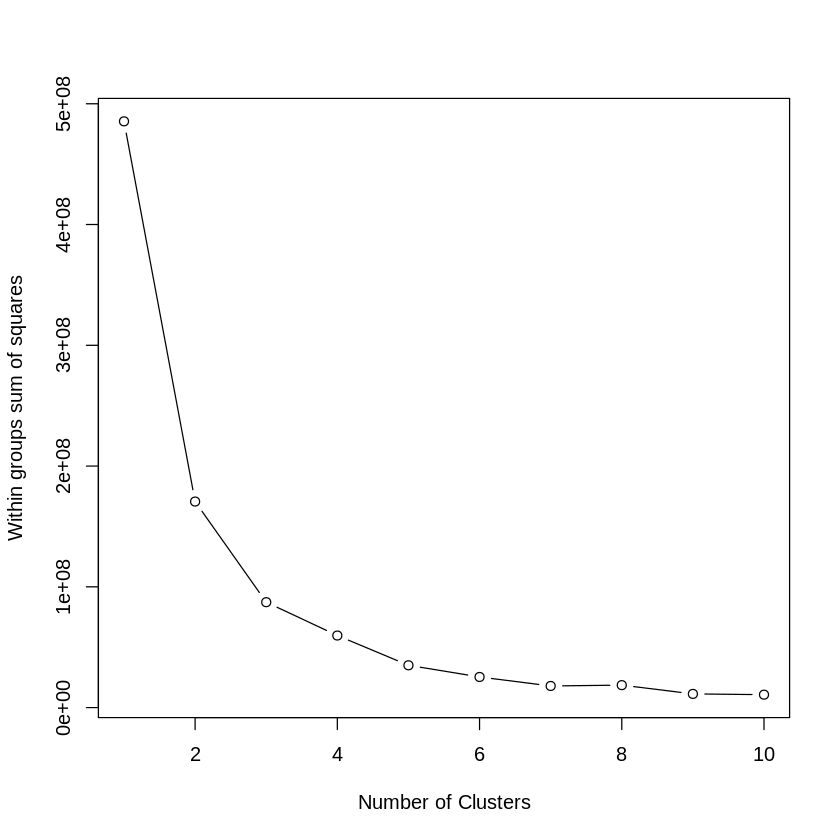

In [19]:
# finding k
# Determine number of clusters
wss <- (nrow(data_new)-1)*sum(apply(data_new,2,var))
for (i in 1:10) wss[i] <- sum(kmeans(data_new,centers=i)$withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")

In [20]:
set.seed(20)
dataCluster <- kmeans(data_new, 5)
dataCluster

K-means clustering with 5 clusters of sizes 105, 105, 29, 53, 68

Cluster means:
  LoanAmount ApplicantIncome
1  102.61905        2711.990
2  107.67619        3535.562
3  122.10345        5894.207
4   92.03774        1842.472
5  112.83824        4550.691

Clustering vector:
  1   2   3   4   5   6   7   8  10  11  12  13  14  16  17  18  19  20  21  22 
  5   1   1   3   1   2   1   4   5   2   2   5   1   1   2   1   5   4   2   2 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  5   2   4   2   2   2   4   1   2   5   2   3   3   1   2   4   1   5   5   1 
 43  44  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  63 
  4   2   2   1   1   5   2   5   4   2   5   2   4   2   2   2   1   2   1   1 
 64  65  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  86 
  2   5   1   4   5   4   5   1   4   3   1   5   4   5   4   1   2   4   1   5 
 87  88  89  90  91  93  94  95  96  97  98  99 101 102 103 104 105 106 107 1

In [21]:
print(dataCluster$centers)

  LoanAmount ApplicantIncome
1  102.61905        2711.990
2  107.67619        3535.562
3  122.10345        5894.207
4   92.03774        1842.472
5  112.83824        4550.691


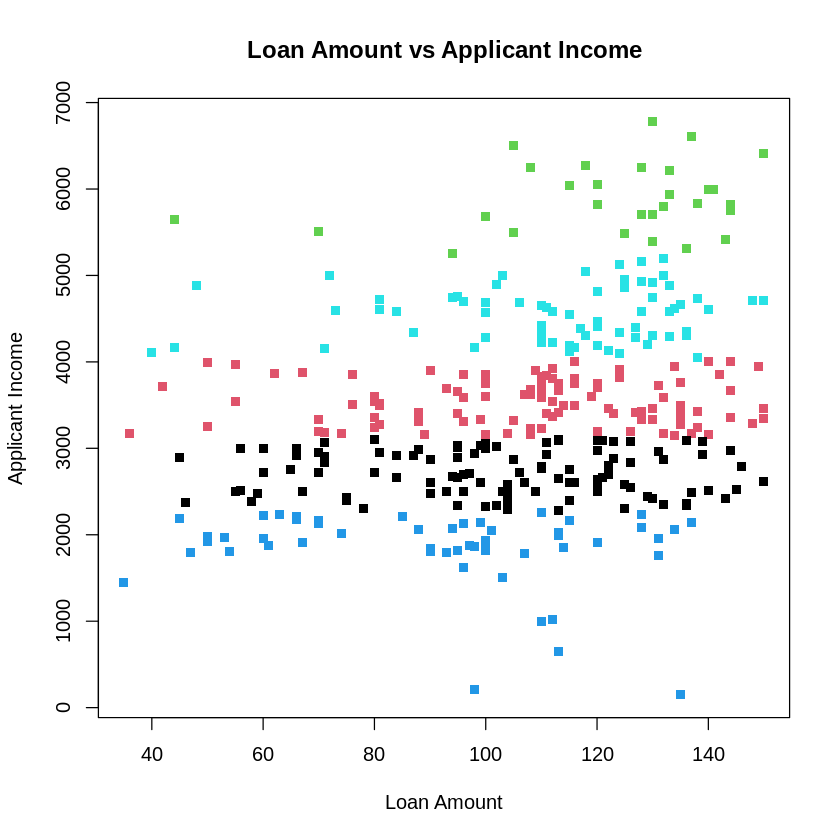

In [22]:
dataCluster$cluster <- as.factor(dataCluster$cluster)
plot(x = data_new$LoanAmount,y = data_new$ApplicantIncome,
xlab = "Loan Amount",
ylab = "Applicant Income",
main = "Loan Amount vs Applicant Income",
col = dataCluster$cluster,
pch = 15
)


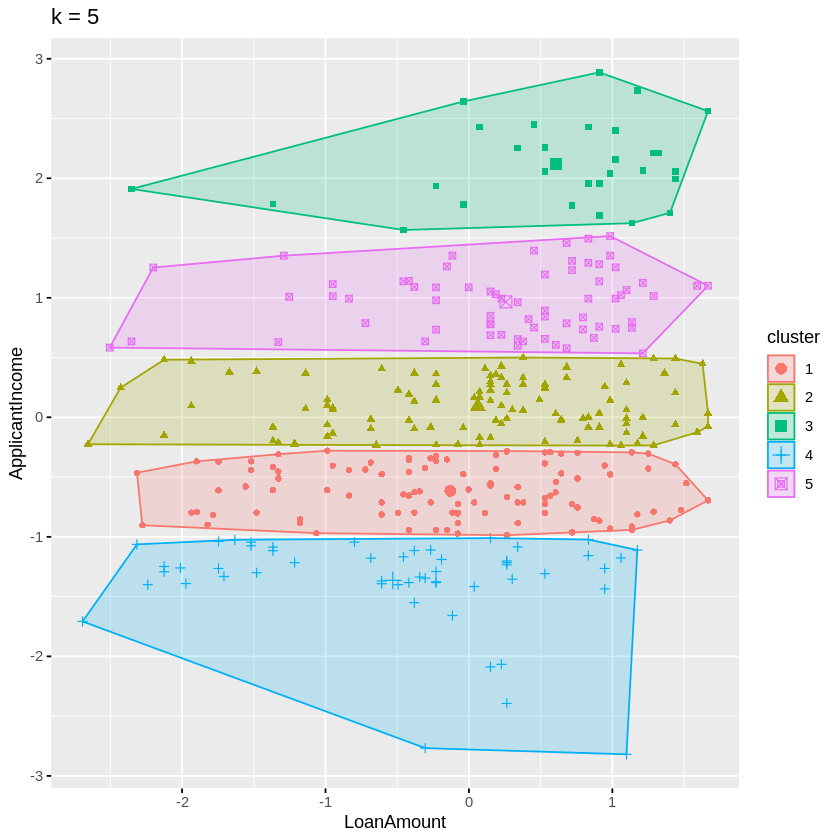

In [23]:
fviz_cluster(dataCluster, geom = "point", data = data_new) +
ggtitle("k = 5")

**Nhận xét**
Khi chia dữ liệu thành 5 nhóm thì các nhóm dữ liệu này khá độc lập, không bị "overlap" với nhau.